# Exercícios - Estatística I

### Questão 1

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência absoluta para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

Carregando as principais bibliotecas que iremos utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
df.age.fillna(df.age.mean(), inplace=True)

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df['alive'].value_counts() # frequência absoluta

no     549
yes    342
Name: alive, dtype: int64

### Questão 2

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

In [5]:
df['alive'].value_counts(normalize=True) # frequência relativa

no     0.616162
yes    0.383838
Name: alive, dtype: float64

In [6]:
df['alive'].value_counts(normalize=True) * 100 # frequência relativa percentual

no     61.616162
yes    38.383838
Name: alive, dtype: float64

In [7]:
df['alive'].value_counts(normalize=True).sort_index().cumsum() * 100 # frequência acumulada

no      61.616162
yes    100.000000
Name: alive, dtype: float64

### Questão 3

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [31]:
media = df['age'].mean() # média
media

29.69911764705882

In [11]:
df['age'].std() # desvio padrão

14.526497332334042

In [14]:
df['age'].min() # valor mínimo

0.42

In [15]:
df['age'].quantile(0.25) # primeiro quartil

20.125

In [32]:
mediana = df['age'].quantile(0.50) # segundo quartil our df['age'].median()
mediana

28.0

In [17]:
df['age'].quantile(0.75) # terceiro quartil

38.0

In [19]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25) 
IQR # distância interquartil

17.875

In [20]:
df['age'].max() # valor máximo

80.0

In [22]:
df['age'].skew() # assimetria ou skewness

0.38910778230082704

In [38]:
moda = float(df['age'].mode()) # moda
moda

24.0

### Questão 4

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Crie um gráfico da distribuição das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

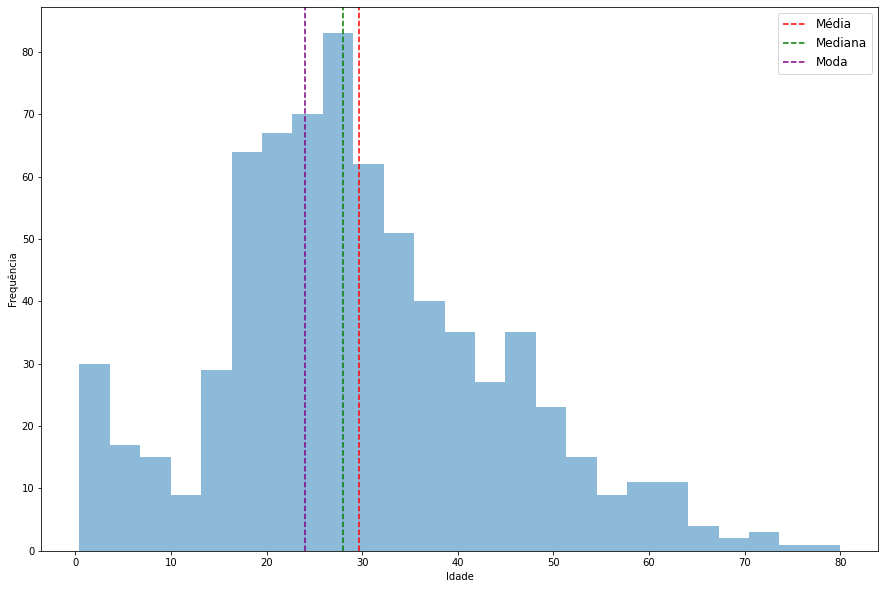

In [43]:
plt.figure(figsize=(15,10))
plt.hist(df['age'], bins=25, alpha=0.5)
plt.axvline(x=media, color='red', linestyle='--', label='Média')
plt.axvline(x=mediana, color='green', linestyle='--', label='Mediana')
plt.axvline(x=moda, color='purple', linestyle='--', label='Moda')
plt.ylabel('Frequência')
plt.xlabel('Idade')
plt.legend(fontsize=12)
plt.show()

### Questão 5

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

In [66]:
df_homens = df[df['sex'] == 'male']
df_mulheres = df[df['sex'] == 'female']

In [67]:
df_homens_sobreviventes = df[(df['sex'] == 'male') & (df['alive'] == 'yes')]
df_mulheres_sobreviventes = df[(df['sex'] == 'female') & (df['alive'] == 'yes')]


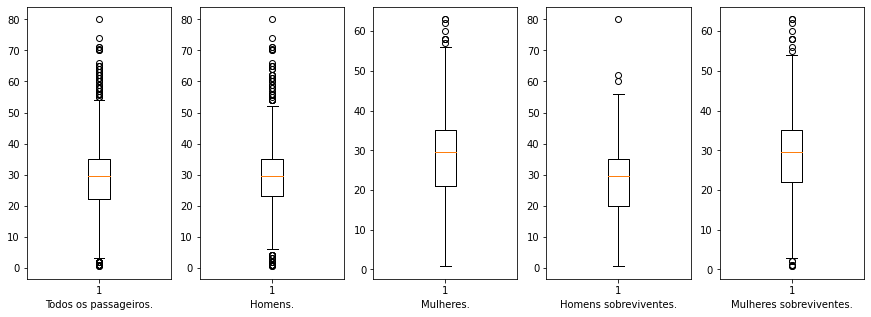

In [72]:
fig, ax = plt.subplots(1, 5, figsize=(15,5))

ax[0].boxplot(df['age'])
ax[0].set_xlabel('Todos os passageiros.')
ax[1].boxplot(df_homens['age'])
ax[1].set_xlabel('Homens.')
ax[2].boxplot(df_mulheres['age'])
ax[2].set_xlabel('Mulheres.')
ax[3].boxplot(df_homens_sobreviventes['age'])
ax[3].set_xlabel('Homens sobreviventes.')
ax[4].boxplot(df_mulheres_sobreviventes['age'])
ax[4].set_xlabel('Mulheres sobreviventes.')

plt.show()

Com o dataset `penguins`, responda as questões abaixo:

sns.load_dataset('penguins')

### Questão 6

Classifique o tipo de dado de cada coluna

In [118]:
df_2 = sns.load_dataset('penguins')
df_2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [119]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [120]:
df_2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [125]:
df_2.body_mass_g.fillna(df_2.body_mass_g.mean(), inplace=True)
df_2.sex.fillna(df_2.sex.mode()[0], inplace=True)

### Questão 7
Calcule a frequência absoluta para cada espécie de pinguim

In [77]:
df_2['species'].value_counts() # frequência absoluta

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Questão 8
Calcule a frequência relativa, relativa percentual e acumulativa de cada espécie de pinguim

In [80]:
df_2['species'].value_counts() # frequência absoluta

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [81]:
df_2['species'].value_counts(normalize=True) * 100 # frequência relativa percentual

Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: species, dtype: float64

In [82]:
df_2['species'].value_counts(normalize=True).sort_index().cumsum() * 100 # frequência acumulada

Adelie        44.186047
Chinstrap     63.953488
Gentoo       100.000000
Name: species, dtype: float64

### Questão 9
Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [96]:
media_penguins = df_2['body_mass_g'].mean() # média
media_penguins

4201.754385964912

In [84]:
df_2['body_mass_g'].std() # desvio padrão

801.9545356980956

In [85]:
df_2['body_mass_g'].min() # valor mínimo

2700.0

In [87]:
df_2['body_mass_g'].quantile(0.25) # primeiro quartil

3550.0

In [89]:
mediana_penguins = df_2['body_mass_g'].quantile(0.50) # segundo quartil our df['age'].median()
mediana_penguins

4050.0

In [90]:
df_2['body_mass_g'].quantile(0.75) # terceiro quartil

4750.0

In [91]:
IQR_penguins = df_2['body_mass_g'].quantile(0.75) - df['age'].quantile(0.25) 
IQR_penguins

4728.0

In [92]:
df_2['body_mass_g'].max() # valor máximo

6300.0

In [93]:
df_2['body_mass_g'].skew() # assimetria ou skewness

0.47169044722118986

In [94]:
moda_penguins = float(df_2['body_mass_g'].mode()) # moda
moda_penguins

3800.0

### Questão 10
Crie um gráfico da distribuição
da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

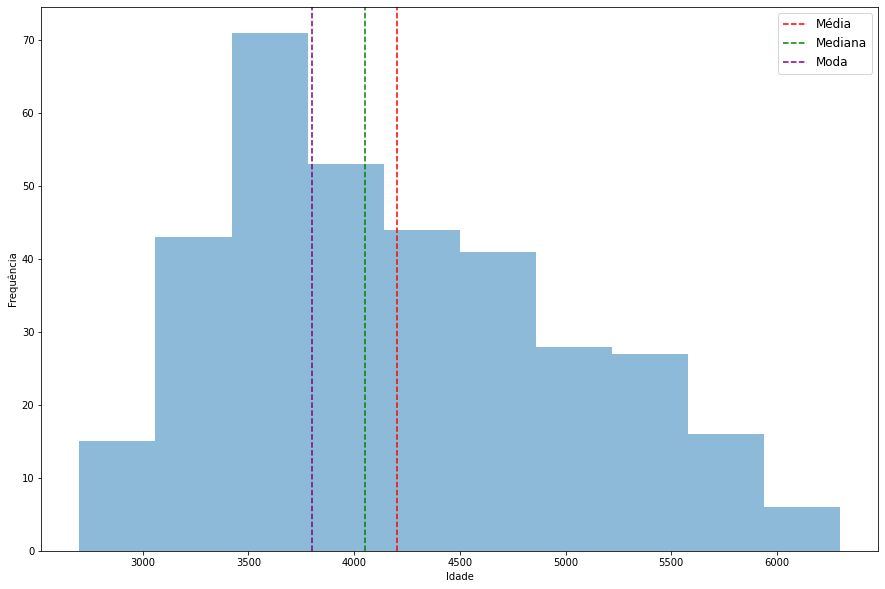

In [101]:
plt.figure(figsize=(15,10))
plt.hist(df_2['body_mass_g'], bins=10, alpha=0.5)
plt.axvline(x=media_penguins, color='red', linestyle='--', label='Média')
plt.axvline(x=mediana_penguins, color='green', linestyle='--', label='Mediana')
plt.axvline(x=moda_penguins, color='purple', linestyle='--', label='Moda')
plt.ylabel('Frequência')
plt.xlabel('Idade')
plt.legend(fontsize=12)
plt.show()


### Questão 11
Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.

In [117]:
df_2.sex.value_counts()

Male                                   168
Female                                 165
0    Male\nName: sex, dtype: object     11
Name: sex, dtype: int64

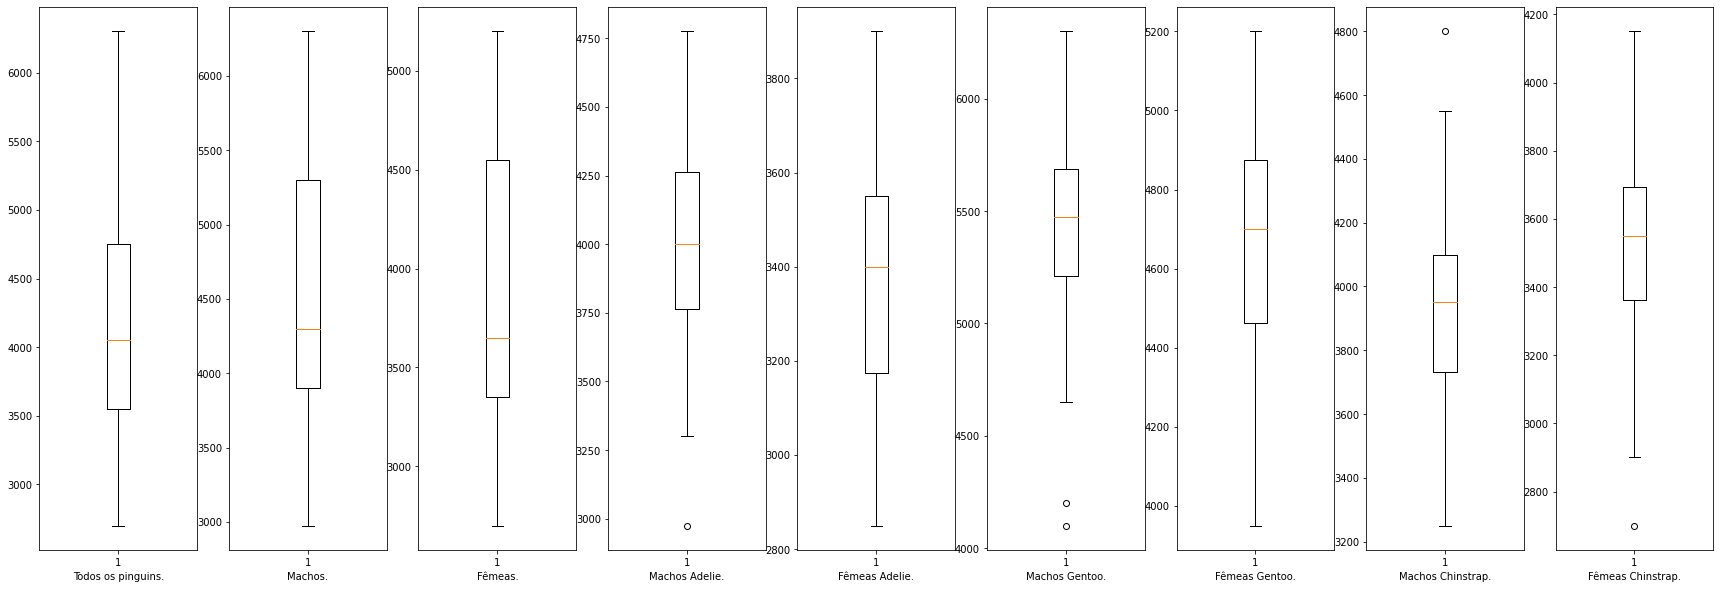

In [127]:
df2_macho = df_2[df_2['sex'] == 'Male']
df2_femeas = df_2[df_2['sex'] == 'Female']

df2_machos_adelie = df_2[(df_2['sex'] == 'Male') & (df_2['species'] == 'Adelie')]
df2_femeas_adelie = df_2[(df_2['sex'] == 'Female') & (df_2['species'] == 'Adelie')]
df2_machos_gentoo = df_2[(df_2['sex'] == 'Male') & (df_2['species'] == 'Gentoo')]
df2_femeas_gentoo = df_2[(df_2['sex'] == 'Female') & (df_2['species'] == 'Gentoo')]
df2_machos_chinstrap = df_2[(df_2['sex'] == 'Male') & (df_2['species'] == 'Chinstrap')]
df2_femeas_chinstrap = df_2[(df_2['sex'] == 'Female') & (df_2['species'] == 'Chinstrap')]

fig, ax = plt.subplots(1, 9, figsize=(30,10))

ax[0].boxplot(df_2['body_mass_g'])
ax[0].set_xlabel('Todos os pinguins.')
ax[1].boxplot(df2_macho['body_mass_g'])
ax[1].set_xlabel('Machos.')
ax[2].boxplot(df2_femeas['body_mass_g'])
ax[2].set_xlabel('Fêmeas.')
ax[3].boxplot(df2_machos_adelie['body_mass_g'])
ax[3].set_xlabel('Machos Adelie.')
ax[4].boxplot(df2_femeas_adelie['body_mass_g'])
ax[4].set_xlabel('Fêmeas Adelie.')
ax[5].boxplot(df2_machos_gentoo['body_mass_g'])
ax[5].set_xlabel('Machos Gentoo.')
ax[6].boxplot(df2_femeas_gentoo['body_mass_g'])
ax[6].set_xlabel('Fêmeas Gentoo.')
ax[7].boxplot(df2_machos_chinstrap['body_mass_g'])
ax[7].set_xlabel('Machos Chinstrap.')
ax[8].boxplot(df2_femeas_chinstrap['body_mass_g'])
ax[8].set_xlabel('Fêmeas Chinstrap.')

plt.show()